<a href="https://colab.research.google.com/github/hamagami/anomaly-detection/blob/main/03_04_%E3%83%9E%E3%83%8F%E3%83%A9%E3%83%8E%E3%83%93%E3%82%B9%E8%B7%9D%E9%9B%A2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCAとマハラノビス距離




In [ ]:
from scipy.spatial import distance #様々な距離関数のライブラリ https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
from sklearn.decomposition import PCA #PCA  https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
import matplotlib.pyplot as plt
import numpy as np

## ダミーデータの作成

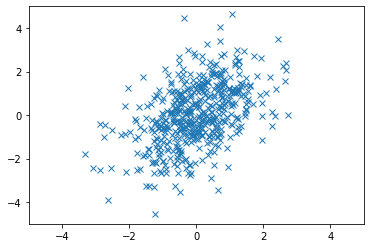

In [ ]:
dnum=500
mean = np.array([0, 0]) # 平均
cov = np.array([[1, 0.7],[0.7, 2]]) # 共分散行列
x, y = np.random.multivariate_normal(mean, cov, dnum).T #多変量正規分布に従う乱数を生成
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.plot(x,y,"x")
plt.show()

In [ ]:
cov

array([[1. , 0.7],
       [0.7, 2. ]])

## ダミーデータをそのままつかって，平均値からの距離をもとに異常を判定する

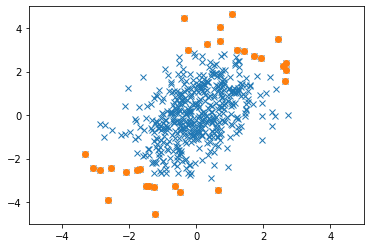

In [ ]:
th= 3 #ここは適宜
ano=[]
for i in range(dnum):
# 平均値からの距離をもとに閾値を超えるサンプルを見つける
    d=distance.euclidean([x[i], y[i]],mean)
    if d >=th:
        ano.append([x[i], y[i]])
ano = np.array(ano)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.plot(x,y,"x")
plt.plot(ano.T[0], ano.T[1],"o")
plt.show() #長径側に偏った異常検知になってしまう．．．

## マハラノビス距離を求めて，閾値を超えるサンプルを異常とみなす

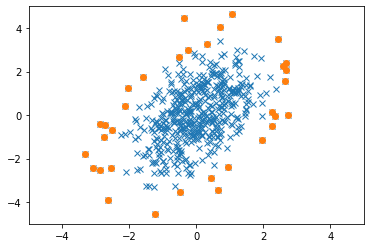

In [ ]:
th= 2.5 #ここは適宜
ano=[]
for i in range(dnum):
# データx, 平均値mean, 共分散行列の逆行列np.linalg.pinv(cov) から距離を計算
    d=distance.mahalanobis([x[i], y[i]], mean, np.linalg.pinv(cov))
    if d >=th:
        ano.append([x[i], y[i]])
ano = np.array(ano)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.plot(x,y,"x")
plt.plot(ano.T[0], ano.T[1],"o")
plt.show() #分布の周辺に異常値が見つかる

## PCAでサンプルを直交化する

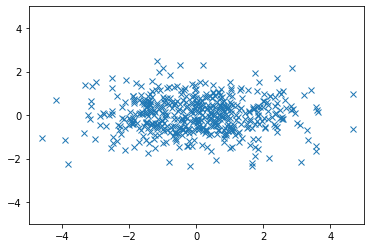

In [ ]:
orgdata=np.array([x,y])
pca=PCA(2)
feature = pca.fit(orgdata.T)
# データを主成分空間に写像
feature = pca.transform(orgdata.T)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.plot(feature.T[0],feature.T[1],"x")
plt.show()
# 直交化することによりx軸, y軸に沿った分布に変換できる

## PCAで求めた結果に対してマハラノビス距離を求める

In [ ]:
#PCAに変換した分布パラメータを求めておく
mean2=np.mean(feature,axis=0)
cov2=np.cov(feature,rowvar=0,)
print("mean=",mean2)
print("cov=",cov2)

mean= [5.95079541e-17 2.03309591e-17]
cov= [[ 2.34596227e+00 -4.91257002e-16]
 [-4.91257002e-16  6.74363386e-01]]


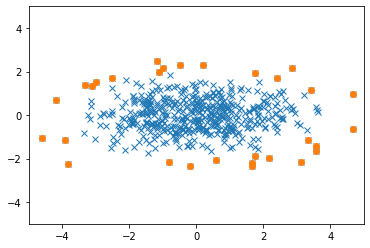

In [ ]:
th= 2.5
ano=[]
for i in range(dnum):
# データx, 平均値mean, 共分散行列の逆行列np.linalg.pinv(cov) から距離を計算
    d=distance.mahalanobis([feature.T[0][i],feature.T[1][i]], mean2, np.linalg.pinv(cov2))
    if d >=th:
        ano.append([feature.T[0][i],feature.T[1][i]])
ano = np.array(ano)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.plot(feature.T[0],feature.T[1],"x")
plt.plot(ano.T[0], ano.T[1],"o")
plt.show()